# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Profissão- Cientista de Dados_M10_support material.csv', sep=',')

### Categorizando clientes 

In [2]:
df.loc[(df['posse_de_imovel'] == True ) & (df['posse_de_veiculo'] == True),  'classe'] = 'A'
df.loc[(df['posse_de_imovel'] == True ) & (df['posse_de_veiculo'] == False), 'classe'] = 'B'
df.loc[(df['posse_de_imovel'] == False) & (df['posse_de_veiculo'] == True),  'classe'] = 'C'
df.loc[(df['posse_de_imovel'] == False) & (df['posse_de_veiculo'] == False), 'classe'] = 'D'
df.loc[(df['posse_de_imovel'] == True ) & (df['posse_de_veiculo'] == True),  'classe2'] = 'Imóvel+Veículo'
df.loc[(df['posse_de_imovel'] == True ) & (df['posse_de_veiculo'] == False), 'classe2'] = 'Imóvel'
df.loc[(df['posse_de_imovel'] == False) & (df['posse_de_veiculo'] == True),  'classe2'] = 'Veículo'
df.loc[(df['posse_de_imovel'] == False) & (df['posse_de_veiculo'] == False), 'classe2'] = 'Nenhum'

df['classe'] = df['classe'].astype('category')
df['classe2'] = df['classe2'].astype('category')
df1=df[['renda','posse_de_veiculo','posse_de_imovel','classe','classe2']]
df1.sample(10)

,renda,posse_de_veiculo,posse_de_imovel,classe,classe2
7451,5642.31,False,False,D,Nenhum
2216,900.58,False,True,B,Imóvel
11681,9438.32,False,True,B,Imóvel
4328,1159.36,True,False,C,Veículo
10747,2292.09,False,False,D,Nenhum
5367,5512.29,True,True,A,Imóvel+Veículo
85,4074.25,True,False,C,Veículo
13662,1998.80,False,False,D,Nenhum
13256,6155.05,False,True,B,Imóvel
1102,2742.41,False,True,B,Imóvel


### Avaliando resultados

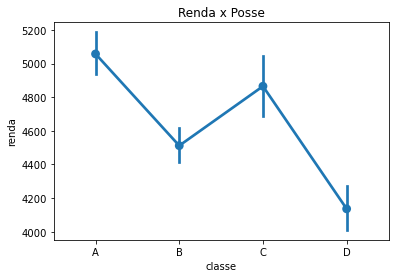

In [3]:
plt.title('Renda x Posse')
ax = sns.pointplot(x='classe', y='renda',data=df1, dodge=True, ci = 90)


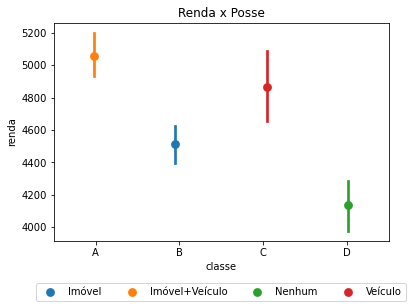

In [4]:
plt.title('Renda x Posse')
ax = sns.pointplot(x='classe', y='renda', hue = 'classe2',data=df1, dodge=True, ci = 95)
plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 4)

# Conclusão
Os clientes foram categorizados de acordo suas posses nas classes A, B, C e D conforme demonstrado abaixo:

|  Classe   | Posse de bens    |
|---:|:-------------|
| A  | Imóvel + Veículo|
| B  | Imóvel|
| C  | Veículo|
| D  | Nenhum|

O resultado final deverá ser visto com cautela devido aos seguintes fatores:
- Conforme esperado, os clientes que possuem imóvel e veículo são os que apresentaram a renda média mais elevada assim como os que não possuem nenhum tipo de bem são os que possuem a renda média mais baixa.
- Diversamente, os clientes que possuem imóvel, tipo de bem que usualmente deveria ter um valor superior aos veículos, apresentaram renda média inferior aos clientes que só possuiam veículos.
- Para uma apuração mais consistente, os valores dos bens deveriam ser considerados em análises futuras.